# Plot changes in classification variables

1. Scatter plots showing change in classification variables
1. Scatter plots showing relationship between classification variables (e.g. median peak warming and peak exceedance probability)

In [49]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [51]:
import os.path
import string

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import utils
import utils.plotting

<IPython.core.display.Javascript object>

In [52]:
x_axis = "SR1.5 calibration SR1.5 processing MAGICC6"
x_axis_short_name = "MAGICC6"
plot_ids = [
    "AR6 calibration SR1.5 processing MAGICCv7.5.3",
    "AR6 calibration SR1.5 processing FaIRv1.6.2",
    "SR1.5 calibration SR1.5 processing FaIR1.3",
    #     "RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3",
]
plot_ids_short_name = "AR6-MAGICC-AR6-FaIR-SR15-FaIR"

x_axis = "SR1.5 calibration SR1.5 processing MAGICC6"
x_axis_short_name = "MAGICC6"
plot_ids = [
    #         "AR6 calibration SR1.5 processing MAGICCv7.5.3",
    #     "AR6 calibration SR1.5 processing FaIRv1.6.2",
    #         "SR1.5 calibration SR1.5 processing FaIR1.3",
    "RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3",
]
plot_ids_short_name = "RCMIP2-MAGICC"

# x_axis = "AR6 calibration SR1.5 processing MAGICCv7.5.3"
# x_axis_short_name = "AR6-MAGICC7"
# plot_ids = [
#     #     "AR6 calibration SR1.5 processing MAGICCv7.5.3",
#     "AR6 calibration SR1.5 processing FaIRv1.6.2",
#     #     "SR1.5 calibration SR1.5 processing FaIR1.3",
#     #     "RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3",
# ]
# plot_ids_short_name = "AR6-FaIR"

<IPython.core.display.Javascript object>

In [53]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 10
# plt.rcParams["figure.figsize"] = [12, 8]

<IPython.core.display.Javascript object>

In [54]:
all_metrics = pd.read_csv(
    os.path.join(utils.DATA_DIR, "processed", "metadata", "extra_meta.csv")
)
all_metrics

SR1.5 Table 2.4 Kyoto-GHG|2010 (SAR)  aim_over_sampling  \
0                 True             in range              False   
1                 True             in range              False   
2                 True             in range              False   
3                 True             in range              False   
4                 True             in range              False   
...                ...                  ...                ...   
38615             True             in range              False   
38616             True             in range              False   
38617             True             in range              False   
38618             True             in range              False   
38619             True             in range              False   

                                                id              model  \
0       SR1.5 calibration SR1.5 processing MAGICC6        AIM/CGE 2.0   
1       SR1.5 calibration SR1.5 processing MAGICC6        AIM/CGE 2.0   
2       SR1.5 calibration SR1.5 processing MAGICC6        AIM/CGE 2.0   
3       SR1.5 calibration SR1.5 processing MAGICC6        AIM/CGE 2.0   
4       SR1.5 calibration SR1.5 processing MAGICC6        AIM/CGE 2.0   
...                                            ...                ...   
38615  AR6 calibration SR1.5 processing FaIRv1.6.2  WITCH-GLOBIOM 4.4   
38616  AR6 calibration SR1.5 processing FaIRv1.6.2  WITCH-GLOBIOM 4.4   
38617  AR6 calibration SR1.5 processing FaIRv1.6.2  WITCH-GLOBIOM 4.4   
38618  AR6 calibration SR1.5 processing FaIRv1.6.2  WITCH-GLOBIOM 4.4   
38619  AR6 calibration SR1.5 processing FaIRv1.6.2  WITCH-GLOBIOM 4.4   

           percentile                scenario           unit  \
0      not_applicable  ADVANCE_2020_1.5C-2100  dimensionless   
1      not_applicable  ADVANCE_2020_1.5C-2100  dimensionless   
2                50.0  ADVANCE_2020_1.5C-2100              K   
3                95.0  ADVANCE_2020_1.5C-2100              K   
4                66.0  ADVANCE_2020_1.5C-2100              K   
...               ...                     ...            ...   
38615             5.0       CD-LINKS_NoPolicy              K   
38616            83.3       CD-LINKS_NoPolicy              K   
38617            16.7       CD-LINKS_NoPolicy              K   
38618            90.0       CD-LINKS_NoPolicy              K   
38619            33.0       CD-LINKS_NoPolicy              K   

                          variable     value  time  
0      Exceedance Probability 1.5C  0.563333  peak  
1      Exceedance Probability 2.0C  0.098333  peak  
2       Surface Temperature (GSAT)  1.537766  peak  
3       Surface Temperature (GSAT)  2.190312  peak  
4       Surface Temperature (GSAT)  1.658100  peak  
...                            ...       ...   ...  
38615   Surface Temperature (GSAT)  2.862036  2100  
38616   Surface Temperature (GSAT)  4.699995  2100  
38617   Surface Temperature (GSAT)  3.231374  2100  
38618   Surface Temperature (GSAT)  4.994788  2100  
38619   Surface Temperature (GSAT)  3.550267  2100  

[38620 rows x 11 columns]

<IPython.core.display.Javascript object>

In [55]:
categorisations = pd.read_csv(
    os.path.join(
        utils.DATA_DIR, "processed", "categorisation", "standard_categorisation.csv"
    )
)
categorisations

model                scenario            category  \
0           AIM/CGE 2.0  ADVANCE_2020_1.5C-2100  1.5C low overshoot   
1           AIM/CGE 2.0      ADVANCE_2020_Med2C           Higher 2C   
2           AIM/CGE 2.0       ADVANCE_2020_WB2C            Lower 2C   
3           AIM/CGE 2.0      ADVANCE_2030_Med2C            Above 2C   
4           AIM/CGE 2.0  ADVANCE_2030_Price1.5C            Lower 2C   
...                 ...                     ...                 ...   
2049  WITCH-GLOBIOM 4.4            CD-LINKS_NPi            Above 2C   
2050  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1000  1.5C low overshoot   
2051  WITCH-GLOBIOM 4.4   CD-LINKS_NPi2020_1600            Lower 2C   
2052  WITCH-GLOBIOM 4.4    CD-LINKS_NPi2020_400          Below 1.5C   
2053  WITCH-GLOBIOM 4.4       CD-LINKS_NoPolicy            Above 2C   

                    subcategory                                           id  
0      Lower 1.5C low overshoot   SR1.5 calibration SR1.5 processing MAGICC6  
1                     Higher 2C   SR1.5 calibration SR1.5 processing MAGICC6  
2                      Lower 2C   SR1.5 calibration SR1.5 processing MAGICC6  
3                      Above 2C   SR1.5 calibration SR1.5 processing MAGICC6  
4                      Lower 2C   SR1.5 calibration SR1.5 processing MAGICC6  
...                         ...                                          ...  
2049                   Above 2C  AR6 calibration SR1.5 processing FaIRv1.6.2  
2050  Higher 1.5C low overshoot  AR6 calibration SR1.5 processing FaIRv1.6.2  
2051                   Lower 2C  AR6 calibration SR1.5 processing FaIRv1.6.2  
2052            Below 1.5C (II)  AR6 calibration SR1.5 processing FaIRv1.6.2  
2053                   Above 2C  AR6 calibration SR1.5 processing FaIRv1.6.2  

[2054 rows x 5 columns]

<IPython.core.display.Javascript object>

In [56]:
# all_data = all_metrics.set_index(["model", "scenario", "id"]).join(
#     categorisations.set_index(["model", "scenario", "id"])
# )
# all_data

<IPython.core.display.Javascript object>

In [57]:
def unstack_column(idf, cols_to_unstack):
    columns = cols_to_unstack
    values = "value"
    index = set(idf.columns) - set(columns) - {values}

    unstacked = idf.pivot_table(
        columns=columns, values=values, index=index
    )  # .reset_index()

    return unstacked

<IPython.core.display.Javascript object>

In [58]:
def stack_except_x_axis(idf, stack_cols):
    index = list((set(idf.columns) - set(stack_cols)))
    return idf.set_index(index).stack().to_frame("value").reset_index()

<IPython.core.display.Javascript object>

Hack: rename 66th percentile to 67th percentile for comparability.

In [59]:
all_metrics_hacked = all_metrics.copy()
all_metrics_hacked = all_metrics_hacked[all_metrics_hacked["SR1.5 Table 2.4"]]
all_metrics_hacked["percentile"] = all_metrics_hacked["percentile"].apply(
    lambda x: "67.0" if x == "66.0" else x
)
display(all_metrics_hacked["percentile"].unique())
all_metrics_hacked.head()

array(['not_applicable', '50.0', '95.0', '67.0', '5.0', '90.0', '10.0',
       '83.3', '16.7', '33.0'], dtype=object)

SR1.5 Table 2.4 Kyoto-GHG|2010 (SAR)  aim_over_sampling  \
0             True             in range              False   
1             True             in range              False   
2             True             in range              False   
3             True             in range              False   
4             True             in range              False   

                                           id        model      percentile  \
0  SR1.5 calibration SR1.5 processing MAGICC6  AIM/CGE 2.0  not_applicable   
1  SR1.5 calibration SR1.5 processing MAGICC6  AIM/CGE 2.0  not_applicable   
2  SR1.5 calibration SR1.5 processing MAGICC6  AIM/CGE 2.0            50.0   
3  SR1.5 calibration SR1.5 processing MAGICC6  AIM/CGE 2.0            95.0   
4  SR1.5 calibration SR1.5 processing MAGICC6  AIM/CGE 2.0            67.0   

                 scenario           unit                     variable  \
0  ADVANCE_2020_1.5C-2100  dimensionless  Exceedance Probability 1.5C   
1  ADVANCE_2020_1.5C-2100  dimensionless  Exceedance Probability 2.0C   
2  ADVANCE_2020_1.5C-2100              K   Surface Temperature (GSAT)   
3  ADVANCE_2020_1.5C-2100              K   Surface Temperature (GSAT)   
4  ADVANCE_2020_1.5C-2100              K   Surface Temperature (GSAT)   

      value  time  
0  0.563333  peak  
1  0.098333  peak  
2  1.537766  peak  
3  2.190312  peak  
4  1.658100  peak

<IPython.core.display.Javascript object>

In [60]:
id_stack = unstack_column(all_metrics_hacked, ["id"])
display(id_stack)

id                                                                                                                                                                AR6 calibration SR1.5 processing FaIRv1.6.2  \
scenario                        model       aim_over_sampling unit          Kyoto-GHG|2010 (SAR) time variable                    percentile     SR1.5 Table 2.4                                                
ADVANCE_2020_1.5C-2100          AIM/CGE 2.0 False             K             in range             2100 Surface Temperature (GSAT)  10.0           True                                                0.858326   
                                                                                                                                  16.7           True                                                0.906971   
                                                                                                                                  33.0           True                                                0.998403   
                                                                                                                                  5.0            True                                                0.807616   
                                                                                                                                  50.0           True                                                1.088791   
...                                                                                                                                                                                                       ...   
TERL_Baseline_NoTransportPolicy AIM/CGE 2.1 False             K             in range             peak Surface Temperature (GSAT)  95.0           True                                                4.669715   
                                                              dimensionless in range             2100 Exceedance Probability 1.5C not_applicable True                                                1.000000   
                                                                                                      Exceedance Probability 2.0C not_applicable True                                                0.998659   
                                                                                                 peak Exceedance Probability 1.5C not_applicable True                                                1.000000   
                                                                                                      Exceedance Probability 2.0C not_applicable True                                                0.998659   

id                                                                                                                                                                AR6 calibration SR1.5 processing MAGICCv7.5.3  \
scenario                        model       aim_over_sampling unit          Kyoto-GHG|2010 (SAR) time variable                    percentile     SR1.5 Table 2.4                                                  
ADVANCE_2020_1.5C-2100          AIM/CGE 2.0 False             K             in range             2100 Surface Temperature (GSAT)  10.0           True                                                  0.831533   
                                                                                                                                  16.7           True                                                  0.897272   
                                                                                                                                  33.0           True                                                  0.993445   
                                                                                                                                  5.0            True                                                  0.781367   
                

<IPython.core.display.Javascript object>

In [61]:
x_axis_stack = stack_except_x_axis(
    id_stack.reset_index(), list(set(id_stack.columns) - {x_axis})
).set_index(list(id_stack.index.names) + ["id"])
x_axis_stack

SR1.5 calibration SR1.5 processing MAGICC6  \
scenario                        model       aim_over_sampling unit          Kyoto-GHG|2010 (SAR) time variable                    percentile     SR1.5 Table 2.4 id                                                                                               
ADVANCE_2020_1.5C-2100          AIM/CGE 2.0 False             K             in range             2100 Surface Temperature (GSAT)  10.0           True            AR6 calibration SR1.5 processing FaIRv1.6.2                                                NaN   
                                                                                                                                                                 AR6 calibration SR1.5 processing MAGICCv7.5.3                                              NaN   
                                                                                                                                                                 RCMIP Phase 2 calibration SR1.5 processing MAGI...                                         NaN   
                                                                                                                                  16.7           True            AR6 calibration SR1.5 processing FaIRv1.6.2                                                NaN   
                                                                                                                                                                 AR6 calibration SR1.5 processing MAGICCv7.5.3                                              NaN   
...                                                                                                                                                                                                                                                         ...   
TERL_Baseline_NoTransportPolicy AIM/CGE 2.1 False             dimensionless in range             peak Exceedance Probability 1.5C not_applicable True            SR1.5 calibration SR1.5 processing FaIR1.3                                                 1.0   
                                                                                                      Exceedance Probability 2.0C not_applicable True            AR6 calibration SR1.5 processing FaIRv1.6.2                                                1.0   
                                                                                                                                                                 AR6 calibration SR1.5 processing MAGICCv7.5.3                                              1.0   
                                                                                                                                                                 RCMIP Phase 2 calibration SR1.5 processing MAGI...                                         1.0   
                                                                                                                                                                 SR1.5 calibration SR1.5 processing FaIR1.3                                                 1.0   

                                                                                                                                                                                                                        value  
scenario                        model       aim_over_sampling unit          Kyoto-GHG|2010 (SAR) time variable                    percentile     SR1.5 Table 2.4 id                                                            
ADVANCE_2020_1.5C-2100          AIM/CGE 2.0 False             K             in range             2100 Surface Temperature (GSAT)  10.0           True            AR6 calibration SR1.5 processing FaIRv1.6.2         0.858326  
                                                                                                                                                                 AR6 calibrat

<IPython.core.display.Javascript object>

In [62]:
def get_mod_scen(inp, find_mod_scens):
    find_mod_scens = pd.MultiIndex.from_frame(find_mod_scens)
    in_idx = inp.index.names
    inp = inp.reset_index().set_index(["model", "scenario"])
    out = inp[inp.index.isin(find_mod_scens)].reset_index().set_index(in_idx)

    return out

<IPython.core.display.Javascript object>

In [63]:
x_axis_stack.index.get_level_values("SR1.5 Table 2.4").unique()

Index([True], dtype='object', name='SR1.5 Table 2.4')

<IPython.core.display.Javascript object>

In [64]:
{k: k for k in all_metrics["id"].unique()}

{'SR1.5 calibration SR1.5 processing MAGICC6': 'SR1.5 calibration SR1.5 processing MAGICC6',
 'SR1.5 calibration SR1.5 processing FaIR1.3': 'SR1.5 calibration SR1.5 processing FaIR1.3',
 'AR6 calibration SR1.5 processing MAGICCv7.5.3': 'AR6 calibration SR1.5 processing MAGICCv7.5.3',
 'RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3': 'RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3',
 'AR6 calibration SR1.5 processing FaIRv1.6.2': 'AR6 calibration SR1.5 processing FaIRv1.6.2'}

<IPython.core.display.Javascript object>

In [65]:
def add_categorisation_bounds(ax, i, shade=False):
    if i == 0 or i == 1 or i == 3:
        if i == 0:
            p_configs = (
                ((0, 0), 1, 0.5, "green", "1.5C"),
                ((0, 0), 0.5, 1, "lime", "SR1.5 MAGICC6 1.5C"),
            )
        if i == 1:
            p_configs = (
                ((0, 0), 1, 0.5, "xkcd:baby blue", "Below 1.5C"),
                ((0, 0), 0.5, 1, "xkcd:baby blue", "SR1.5 MAGICC6 Below 1.5C"),
                ((0, 0.5), 1, 0.17, "blue", "1.5C low overshoot or 2C"),
                (
                    (0.5, 0),
                    0.17,
                    1,
                    "blue",
                    "SR1.5 MAGICC6 1.5C low overshoot or 2C",
                ),
                ((0, 0.67), 1, 0.33, "xkcd:darkish blue", "1.5C high overshoot or 2C"),
                (
                    (0.67, 0),
                    0.33,
                    1,
                    "xkcd:darkish blue",
                    "SR1.5 MAGICC6 1.5C high overshoot or 2C",
                ),
            )
        if i == 3:
            p_configs = (
                ((0, 0), 1, 0.34, "xkcd:orange", "Lower 2C or below"),
                ((0, 0), 0.34, 1, "xkcd:orange", "SR1.5 MAGICC6 Lower 2C or below"),
                ((0, 0.34), 1, 0.16, "xkcd:red", "Higher 2C or below"),
                ((0.34, 0), 0.16, 1, "xkcd:red", "SR1.5 MAGICC6 Higher 2C or below"),
                ((0, 0.5), 1, 0.5, "darkgrey", "1.5C Above 2C"),
                (
                    (0.5, 0),
                    0.5,
                    1,
                    "darkgrey",
                    "SR1.5 MAGICC6 1.5C Above 2C",
                ),
            )

        for (p, w, h, colour, label) in p_configs:
            if shade:
                rect = patches.Rectangle(
                    p,
                    w,
                    h,
                    linewidth=0,
                    edgecolor="none",
                    facecolor=colour,
                    alpha=0.1,
                    zorder=1,
                    #                 linewidth=2,
                    #                 edgecolor="gray",
                    #                 facecolor="none",
                    #                 alpha=0.5,
                    #                 zorder=1,
                )
                # Add the patch to the Axes
                ax.add_patch(rect)
                handles[label] = rect

            lkwargs = dict(
                linewidth=2,
                color="gray",
                alpha=0.5,
                zorder=0.8,
            )

            if w == 1:
                level = p[1] + h
                if level < 1:
                    line = ax.axhline(level, **lkwargs)
            elif h == 1:
                level = p[0] + w
                if level < 1:
                    line = ax.axvline(level, **lkwargs)

<IPython.core.display.Javascript object>

In [66]:
def get_label_prefix_temperature(title):
    if "50.0" in title:
        if "2100" in title:
            label_prefix = "2100 median"
        if "peak" in title:
            label_prefix = "Peak median"
    if "67.0" in title:
        if "2100" in title:
            label_prefix = "2100 67%"
        if "peak" in title:
            label_prefix = "Peak 67%"

    try:
        return label_prefix
    except UnboundLocalError:
        raise ValueError(title)


def get_ylabel_abs_temperature(label_prefix):
    return f"Emulator {label_prefix} warming (GSAT) rel. 1850-1900 (K)"


def get_xlabel_abs_temperature(label_prefix):
    return f"{utils.plotting.short_id(x_axis)} {label_prefix} warming (GSAT) rel. 1850-1900 (K)"


def get_xlabel_delta_temperature(label_prefix):
    return f"Emulator - {utils.plotting.short_id(x_axis)}\n{label_prefix} warming (GSAT) rel. 1850-1900 (K)"


temperature_settings = {
    "variables": ["Surface Temperature (GSAT)"],
    "percentiles": ["50.0", "67.0"],
    "vlim_abs": [0.9, 2.5],
    "add_categorisation_bounds_abs": False,
    "row": "percentile",
    "get_label_prefix": get_label_prefix_temperature,
    "get_ylabel_abs": get_ylabel_abs_temperature,
    "get_xlabel_abs": get_xlabel_abs_temperature,
    "get_xlabel_delta": get_xlabel_delta_temperature,
    "fig_name": "classification-temperatures",
}

<IPython.core.display.Javascript object>

In [67]:
def get_label_prefix_exceedance_prob(title):
    if "1.5C" in title:
        if "2100" in title:
            label_prefix = "2100 1.5C exceedance probability"
        if "peak" in title:
            label_prefix = "Peak 1.5C exceedance probability"
    if "2.0C" in title:
        if "2100" in title:
            label_prefix = "2100 2.0C exceedance probability"
        if "peak" in title:
            label_prefix = "Peak 2.0C exceedance probability"
    try:
        return label_prefix
    except UnboundLocalError:
        raise ValueError(title)


def get_ylabel_abs_exceedance_prob(label_prefix):
    return f"Emulator {label_prefix}"


def get_xlabel_abs_exceedance_prob(label_prefix):
    return f"{utils.plotting.short_id(x_axis)} {label_prefix}"


def get_xlabel_delta_exceedance_prob(label_prefix):
    return f"Emulator - {utils.plotting.short_id(x_axis)} {label_prefix}"


exceedance_prob_settings = {
    "variables": ["Exceedance Probability 1.5C", "Exceedance Probability 2.0C"],
    "percentiles": ["not_applicable"],
    "vlim_abs": [0, 1.0],
    "add_categorisation_bounds_abs": True,
    "row": "variable",
    "get_label_prefix": get_label_prefix_exceedance_prob,
    "get_ylabel_abs": get_ylabel_abs_exceedance_prob,
    "get_xlabel_abs": get_xlabel_abs_exceedance_prob,
    "get_xlabel_delta": get_xlabel_delta_exceedance_prob,
    "fig_name": "classification-exceedance-probabilities",
}

<IPython.core.display.Javascript object>

In [68]:
x_axis_stack.index.get_level_values("id").unique()

Index(['AR6 calibration SR1.5 processing FaIRv1.6.2',
       'AR6 calibration SR1.5 processing MAGICCv7.5.3',
       'RCMIP Phase 2 calibration SR1.5 processing MAGICCv7.5.3',
       'SR1.5 calibration SR1.5 processing FaIR1.3'],
      dtype='object', name='id')

<IPython.core.display.Javascript object>

In [69]:
def get_deltas(inp, delta_name):
    return (inp["value"] - inp[x_axis]).to_frame(delta_name).reset_index()

<IPython.core.display.Javascript object>

model                                scenario
0              AIM/CGE 2.0                  ADVANCE_2020_1.5C-2100
80             IMAGE 3.0.1                  ADVANCE_2020_1.5C-2100
160    MESSAGE-GLOBIOM 1.0                  ADVANCE_2020_1.5C-2100
240          POLES ADVANCE                  ADVANCE_2020_1.5C-2100
320             REMIND 1.7                  ADVANCE_2020_1.5C-2100
...                    ...                                     ...
29026          AIM/CGE 2.1              TERL_15D_NoTransportPolicy
29106          AIM/CGE 2.1        TERL_2D_LowCarbonTransportPolicy
29186          AIM/CGE 2.1               TERL_2D_NoTransportPolicy
29266          AIM/CGE 2.1  TERL_Baseline_LowCarbonTransportPolicy
29346          AIM/CGE 2.1         TERL_Baseline_NoTransportPolicy

[368 rows x 2 columns]

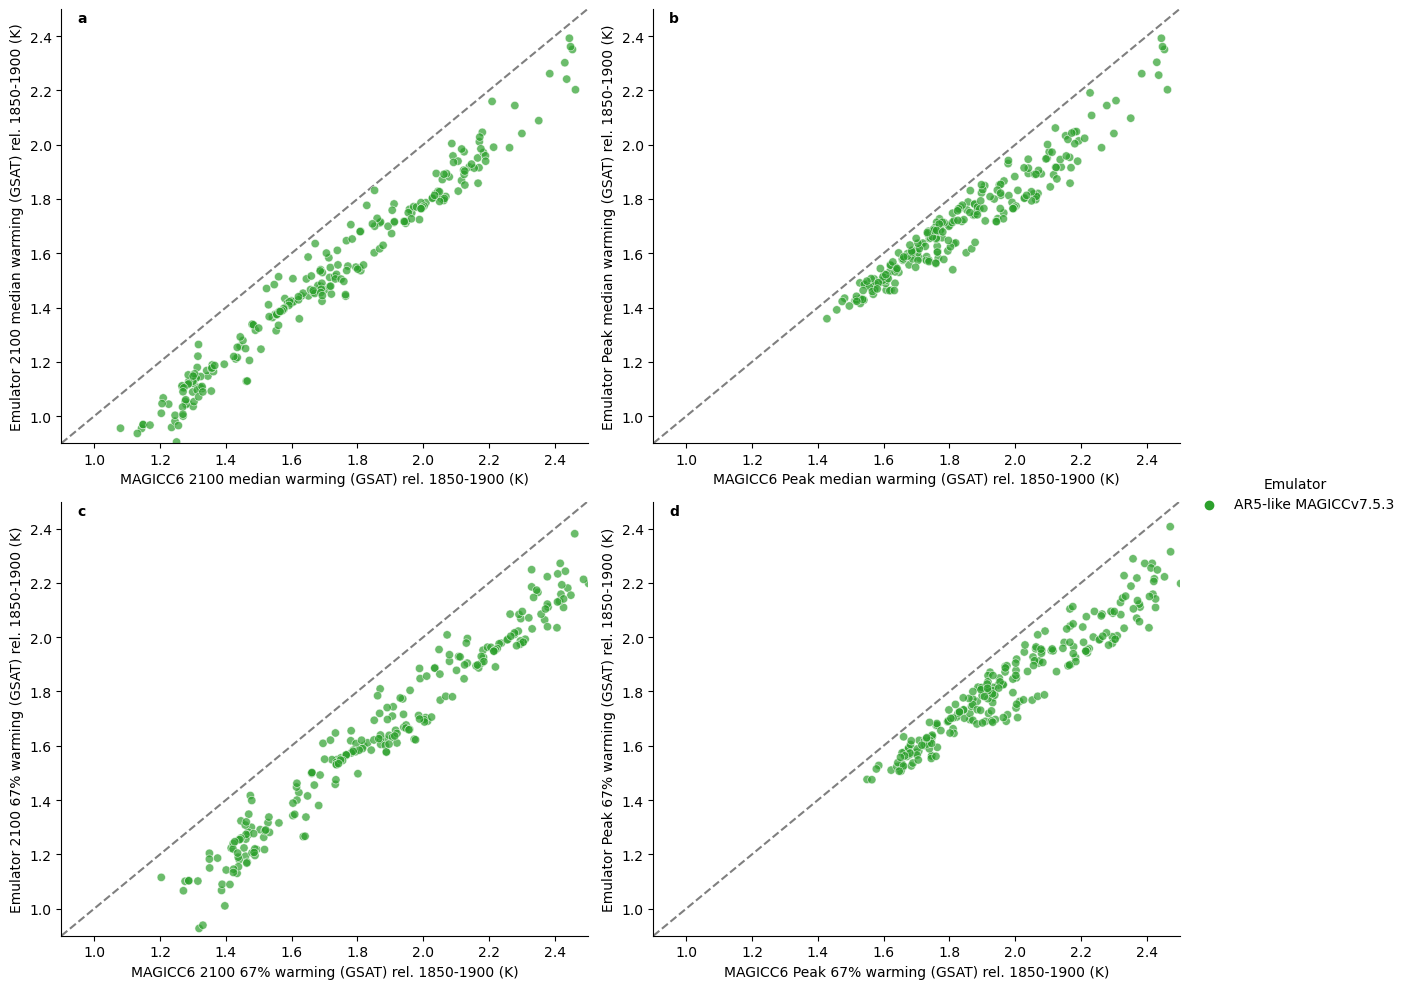

/data/ubuntu-znicholls/miniconda3/envs/nicholls-et-al-2022-emulator-changes/lib/python3.7/site-packages/seaborn/axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


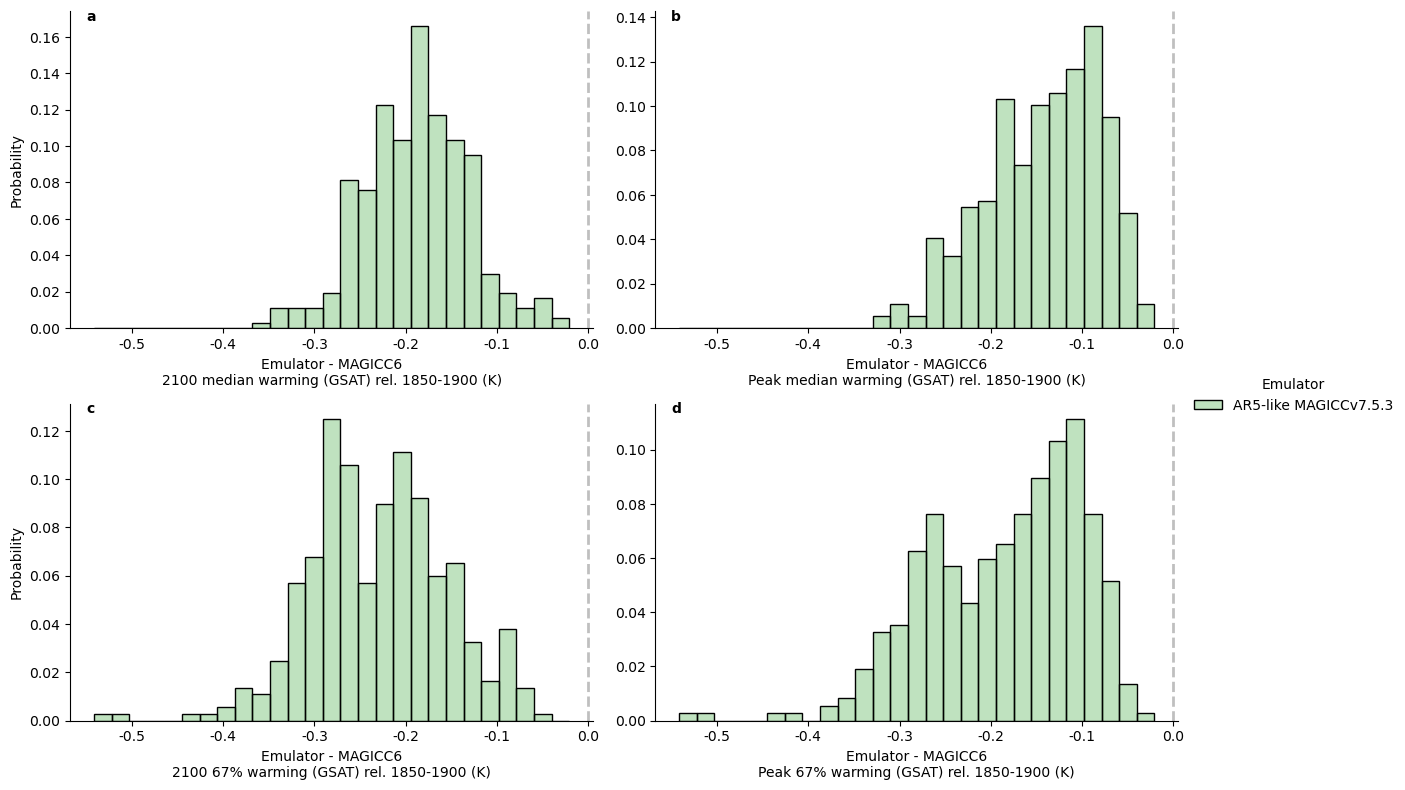

Difference from SR1.5 calibration SR1.5 processing MAGICC6  \
                                                                                                           count   
percentile id                    time SR1.5 Table 2.4                                                              
50.0       AR5-like MAGICCv7.5.3 2100 True                                                         368.0           
                                 peak True                                                         368.0           
67.0       AR5-like MAGICCv7.5.3 2100 True                                                         368.0           
                                 peak True                                                         368.0           

                                                                           \
                                                           mean       std   
percentile id                    time SR1.5 Table 2.4                       
50.0       AR5-like MAGICCv7.5.3 2100 True            -0.188406  0.056895   
                                 peak True            -0.141777  0.062322   
67.0       AR5-like MAGICCv7.5.3 2100 True            -0.229595  0.074920   
                                 peak True            -0.184165  0.084453   

                                                                           \
                                                            min        5%   
percentile id                    time SR1.5 Table 2.4                       
50.0       AR5-like MAGICCv7.5.3 2100 True            -0.351235 -0.274223   
                                 peak True            -0.317480 -0.254532   
67.0       AR5-like MAGICCv7.5.3 2100 True            -0.541756 -0.339975   
                                 peak True            -0.541756 -0.319648   

                                                                           \
                                                            25%       50%   
percentile id                    time SR1.5 Table 2.4                       
50.0       AR5-like MAGICCv7.5.3 2100 True            -0.225588 -0.182739   
                                 peak True            -0.180309 -0.133032   
67.0       AR5-like MAGICCv7.5.3 2100 True            -0.277147 -0.229871   
                                 peak True            -0.251754 -0.168108   

                                                                           \
                                                            75%       95%   
percentile id                    time SR1.5 Table 2.4                       
50.0       AR5-like MAGICCv7.5.3 2100 True            -0.150153 -0.097723   
                                 peak True            -0.092563 -0.056159   
67.0       AR5-like MAGICCv7.5.3 2100 True            -0.182095 -0.097178   
                                 peak True            -0.116169 -0.072145   

                                                                 
                                                            max  
percentile id                    time SR1.5 Table 2.4            
50.0       AR5-like MAGICCv7.5.3 2100 True            -0.020442  
                                 peak True            -0.032768  
67.0       AR5-like MAGICCv7.5.3 2100 True            -0.057866  
                                 peak True            -0.027900

model                                scenario
0              AIM/CGE 2.0                  ADVANCE_2020_1.5C-2100
80             IMAGE 3.0.1                  ADVANCE_2020_1.5C-2100
160    MESSAGE-GLOBIOM 1.0                  ADVANCE_2020_1.5C-2100
240          POLES ADVANCE                  ADVANCE_2020_1.5C-2100
320             REMIND 1.7                  ADVANCE_2020_1.5C-2100
...                    ...                                     ...
29026          AIM/CGE 2.1              TERL_15D_NoTransportPolicy
29106          AIM/CGE 2.1        TERL_2D_LowCarbonTransportPolicy
29186          AIM/CGE 2.1               TERL_2D_NoTransportPolicy
29266          AIM/CGE 2.1  TERL_Baseline_LowCarbonTransportPolicy
29346          AIM/CGE 2.1         TERL_Baseline_NoTransportPolicy

[368 rows x 2 columns]

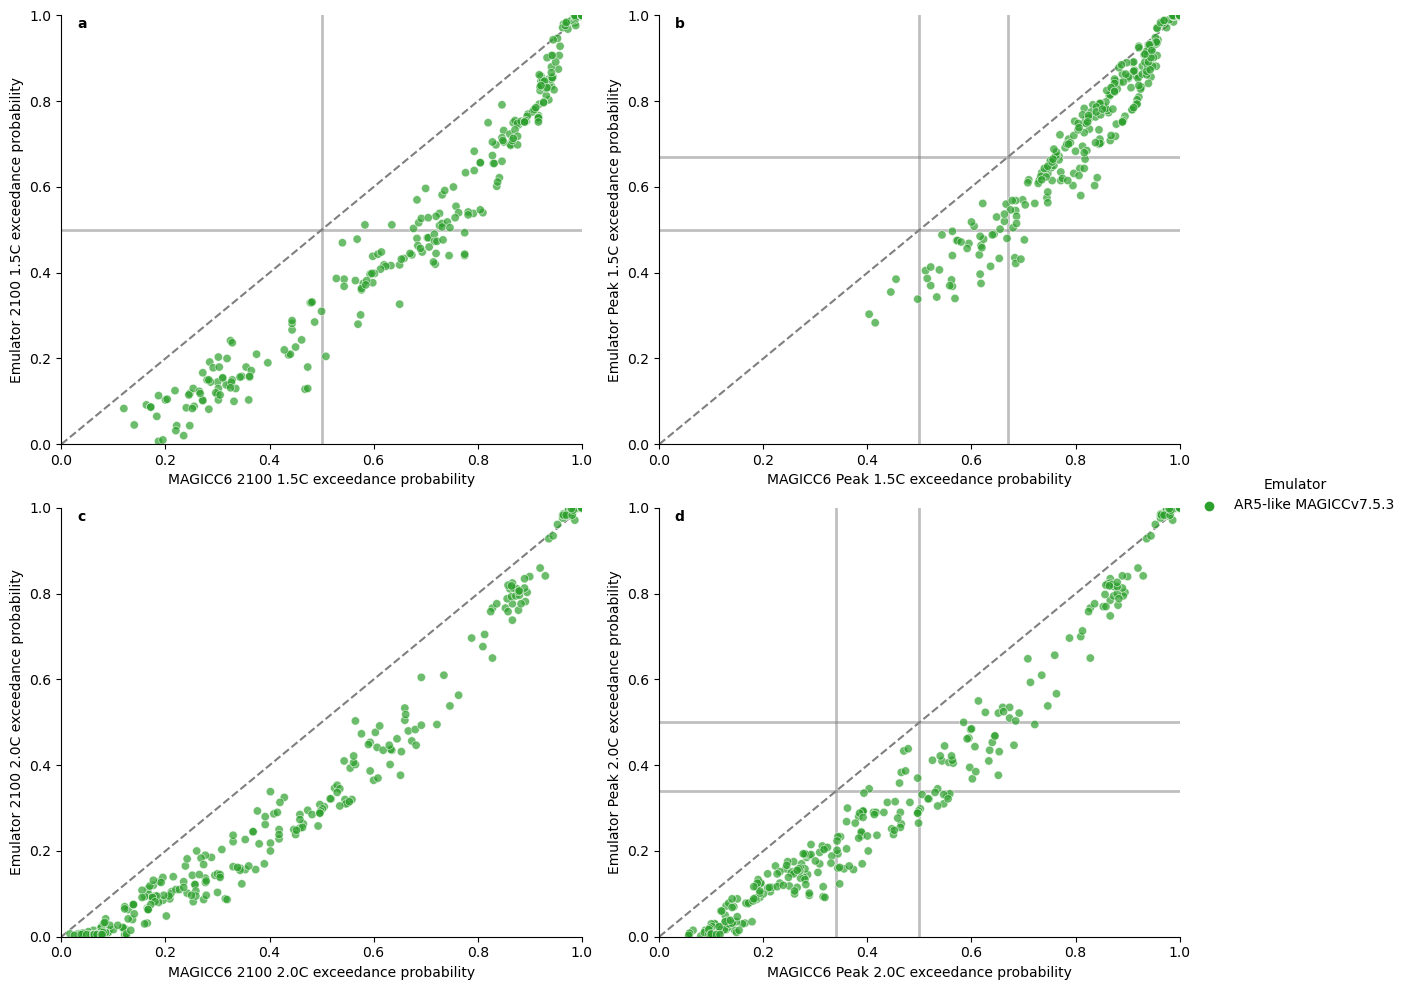

/data/ubuntu-znicholls/miniconda3/envs/nicholls-et-al-2022-emulator-changes/lib/python3.7/site-packages/ipykernel_launcher.py:124: UserWarning: FixedFormatter should only be used together with FixedLocator
/data/ubuntu-znicholls/miniconda3/envs/nicholls-et-al-2022-emulator-changes/lib/python3.7/site-packages/seaborn/axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


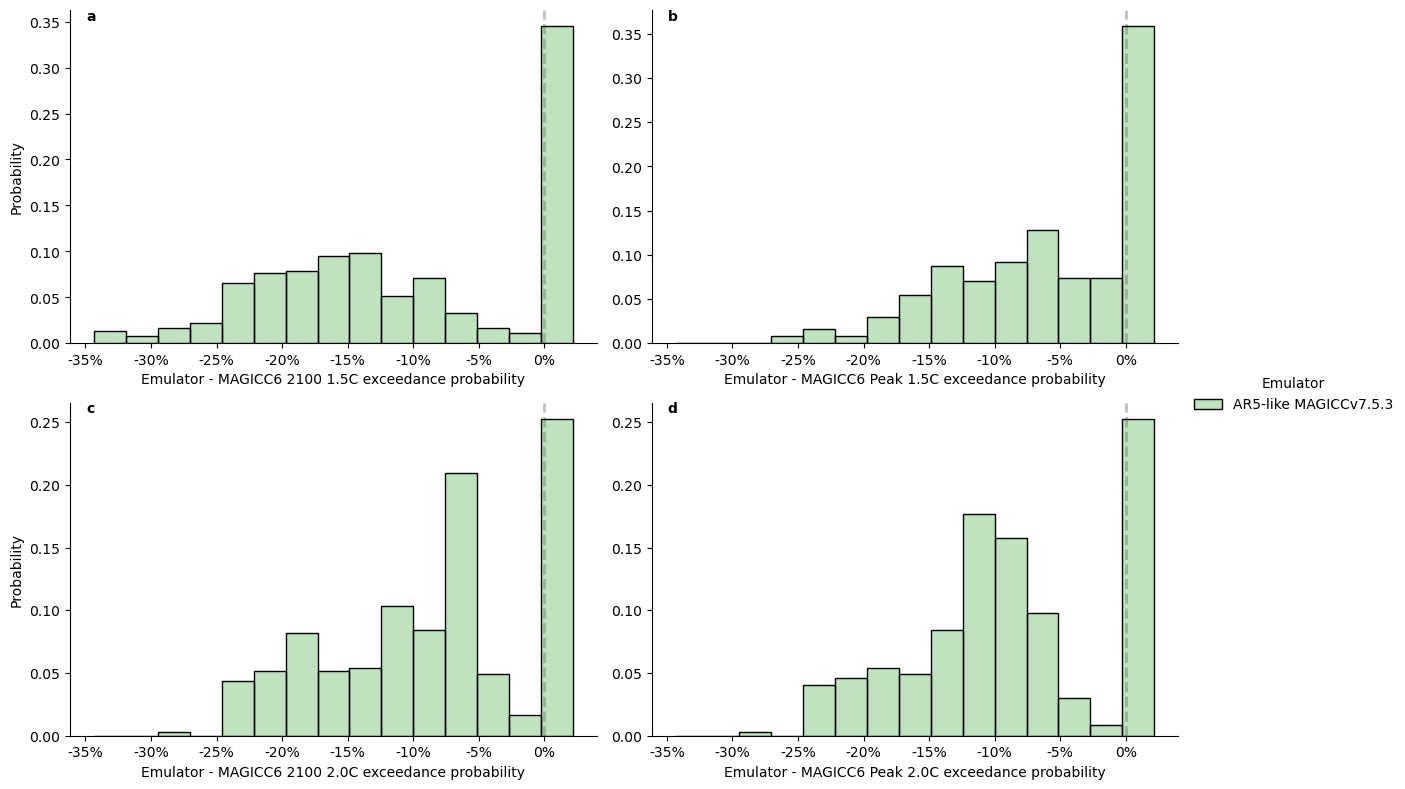

Difference from SR1.5 calibration SR1.5 processing MAGICC6  \
                                                                                                                            count   
variable                    id                    time SR1.5 Table 2.4                                                              
Exceedance Probability 1.5C AR5-like MAGICCv7.5.3 2100 True                                                         368.0           
                                                  peak True                                                         368.0           
Exceedance Probability 2.0C AR5-like MAGICCv7.5.3 2100 True                                                         368.0           
                                                  peak True                                                         368.0           

                                                                                   \
                                                                             mean   
variable                    id                    time SR1.5 Table 2.4              
Exceedance Probability 1.5C AR5-like MAGICCv7.5.3 2100 True            -10.525815   
                                                  peak True             -6.098732   
Exceedance Probability 2.0C AR5-like MAGICCv7.5.3 2100 True             -8.536232   
                                                  peak True             -8.798007   

                                                                                  \
                                                                             std   
variable                    id                    time SR1.5 Table 2.4             
Exceedance Probability 1.5C AR5-like MAGICCv7.5.3 2100 True             9.478381   
                                                  peak True             6.636015   
Exceedance Probability 2.0C AR5-like MAGICCv7.5.3 2100 True             7.423108   
                                                  peak True             7.056525   

                                                                                   \
                                                                              min   
variable                    id                    time SR1.5 Table 2.4              
Exceedance Probability 1.5C AR5-like MAGICCv7.5.3 2100 True            -34.333333   
                                                  peak True            -26.333333   
Exceedance Probability 2.0C AR5-like MAGICCv7.5.3 2100 True            -27.500000   
                                                  peak True            -27.500000   

                                                                                   \
                                                                               5%   
variable                    id                    time SR1.5 Table 2.4              
Exceedance Probability 1.5C AR5-like MAGICCv7.5.3 2100 True            -25.158333   
                                                  peak True            -17.941667   
Exceedance Probability 2.0C AR5-like MAGICCv7.5.3 2100 True            -21.666667   
                                                  peak True            -21.383333   

                                                                                   \
                                                                              25%   
variable                    id                    time SR1.5 Table 2.4              
Exceedance Probability 1.5C AR5-like MAGICCv7.5.3 2100 True            -17.833333   
                                                  peak True            -10.833333   
Exceedance Probability 2.0C AR5-like MAGICCv7.5.3 2100 True            -13.625000   
                                                  peak True            -13.041667   

                                                                                   \
                                                                              50%

<IPython.core.display.Javascript object>

In [70]:
delta_name = f"Difference from {x_axis}"
legend_title = "Emulator"

palette = {
    utils.plotting.short_id(idh): utils.plotting.ID_COLOURS[idh] for idh in plot_ids
}
pkwargs = dict(
    palette=palette,
    hue="id",
    col="time",
)

for settings in [temperature_settings, exceedance_prob_settings]:
    variables = settings["variables"]
    percentiles = settings["percentiles"]
    vlim_abs = settings["vlim_abs"]
    add_categorisation_bounds_abs = settings["add_categorisation_bounds_abs"]
    fig_name = settings["fig_name"]
    pkwargs["row"] = settings["row"]
    get_label_prefix = settings["get_label_prefix"]
    get_ylabel_abs = settings["get_ylabel_abs"]
    get_xlabel_abs = settings["get_xlabel_abs"]
    get_xlabel_delta = settings["get_xlabel_delta"]

    mod_scen_to_plot = x_axis_stack.reset_index()[
        ["model", "scenario"]
    ].drop_duplicates()
    display(mod_scen_to_plot)

    pdf = get_mod_scen(x_axis_stack, mod_scen_to_plot)
    pdf = pdf[
        pdf.index.get_level_values("percentile").isin(percentiles)
        & pdf.index.get_level_values("id").isin(plot_ids)
    ]

    pdf = pdf.reset_index("id")
    pdf["id"] = pdf["id"].apply(utils.plotting.short_id)
    pdf = pdf.set_index("id", append=True)

    fg = sns.relplot(
        data=pdf.reset_index(),
        x=x_axis,
        y="value",
        height=5,
        aspect=1,
        facet_kws={"sharey": False, "sharex": False},
        alpha=0.7,
        #     alpha=1,
        **pkwargs,
    )

    handles = {v.get_label(): v for v in fg.legend.legendHandles}

    for i, ax in enumerate(fg.axes.flatten()):
        ax.axline((0, 0), slope=1, color="k", linestyle="--", zorder=0.8, alpha=0.5)
        ax.set_xlim(vlim_abs)
        ax.set_ylim(vlim_abs)

        label_prefix = get_label_prefix(ax.get_title())
        ax.set_title("")

        ax.set_ylabel(get_ylabel_abs(label_prefix))
        ax.set_xlabel(get_xlabel_abs(label_prefix))

        if add_categorisation_bounds_abs:
            add_categorisation_bounds(ax, i)

        ax.annotate(
            string.ascii_lowercase[i],
            xy=(0.03, 0.97),
            xycoords="axes fraction",
            fontweight="bold",
        )

    plt.tight_layout()
    fg.legend.remove()
    fg.add_legend(handles, title=legend_title)

    plt.savefig(
        os.path.join(
            utils.FIGURES_DIR,
            f"210_absolute-{fig_name}_{x_axis_short_name}_{plot_ids_short_name}.pdf",
        ),
        transparent=True,
    )
    plt.show()

    deltas = get_deltas(pdf, delta_name)

    if all([v.startswith("Exceedance Probability") for v in variables]):
        deltas[delta_name] *= 100
        percentage_x_axis_titles = True
    else:
        percentage_x_axis_titles = False

    fg = sns.displot(
        data=deltas,
        x=delta_name,
        height=4,
        aspect=1.25,
        facet_kws={"sharey": False, "sharex": False},
        alpha=0.3,
        kind="hist",
        common_norm=False,
        stat="probability",
        **pkwargs,
    )

    for i, ax in enumerate(fg.axes.flatten()):
        label_prefix = get_label_prefix(ax.get_title())
        ax.set_title("")

        ax.set_xlabel(get_xlabel_delta(label_prefix))
        ax.axvline(
            0,
            linestyle="--",
            linewidth=2,
            color="gray",
            alpha=0.5,
            zorder=0.8,
        )

        if percentage_x_axis_titles:
            ax.set_xticklabels([f"{str(v.get_text())}%" for v in ax.get_xticklabels()])

        ax.annotate(
            string.ascii_lowercase[i],
            xy=(0.03, 0.97),
            xycoords="axes fraction",
            fontweight="bold",
        )

    plt.tight_layout()
    fg.legend.remove()
    # fg.add_legend(handles, title=legend_title)
    fg.add_legend(
        handles=fg.legend.legendHandles,
        labels=[t.get_text() for t in fg.legend.texts],
        title=legend_title,
    )
    # display(pdf[pdf["scenario"].isin(["SSP1-26"]) & pdf["model"].isin(["IMAGE 3.0.1"])])
    # display(pdf[pdf[delta_name].abs() > 0.4])
    plt.savefig(
        os.path.join(
            utils.FIGURES_DIR,
            f"210_delta-{fig_name}_{x_axis_short_name}_{plot_ids_short_name}.pdf",
        ),
        transparent=True,
    )
    plt.show()

    display(
        deltas.groupby(
            [pkwargs["row"], pkwargs["hue"], pkwargs["col"], "SR1.5 Table 2.4"]
        ).describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
    )

In [71]:
variable_stack = id_stack.unstack(["variable", "unit", "percentile", "time"]).stack(
    "id"
)

variable_stack = variable_stack.loc[
    :,
    variable_stack.columns.get_level_values("percentile").isin(
        ["not_applicable", "50.0", "67.0"]
    ),
]


def check_unit_values(idf, variable_start, exp_unit):
    units = idf.loc[
        :,
        idf.columns.get_level_values("variable").map(
            lambda x: x.startswith(variable_start)
        ),
    ].columns.get_level_values("unit")

    assert (units == exp_unit).all(), units


check_unit_values(variable_stack, "Exceedance", "dimensionless")
check_unit_values(variable_stack, "Surface Temperature", "K")
variable_stack = variable_stack.droplevel("unit", axis=1)


def flatten_variable_name(v):
    if "Surface Temperature" in v:
        return f"{get_label_prefix_temperature(v)} surface temperature (GSAT)"

    return get_label_prefix_exceedance_prob(v)


variable_stack.columns = variable_stack.columns.map(
    lambda x: (f"{x[2]} {x[0]} {x[1]}")
).map(flatten_variable_name)
variable_stack

2100 1.5C exceedance probability  \
scenario                        model       aim_over_sampling Kyoto-GHG|2010 (SAR) SR1.5 Table 2.4 id                                                                                     
ADVANCE_2020_1.5C-2100          AIM/CGE 2.0 False             in range             True            AR6 calibration SR1.5 processing FaIRv1.6.2                                 0.074654   
                                                                                                   AR6 calibration SR1.5 processing MAGICCv7.5.3                               0.125000   
                                                                                                   RCMIP Phase 2 calibration SR1.5 processing MAGI...                          0.043333   
                                                                                                   SR1.5 calibration SR1.5 processing FaIR1.3                                  0.022000   
                                                                                                   SR1.5 calibration SR1.5 processing MAGICC6                                  0.221667   
...                                                                                                                                                                                 ...   
TERL_Baseline_NoTransportPolicy AIM/CGE 2.1 False             in range             True            AR6 calibration SR1.5 processing FaIRv1.6.2                                 1.000000   
                                                                                                   AR6 calibration SR1.5 processing MAGICCv7.5.3                               1.000000   
                                                                                                   RCMIP Phase 2 calibration SR1.5 processing MAGI...                          1.000000   
                                                                                                   SR1.5 calibration SR1.5 processing FaIR1.3                                  1.000000   
                                                                                                   SR1.5 calibration SR1.5 processing MAGICC6                                  1.000000   

                                                                                                                                                       Peak 1.5C exceedance probability  \
scenario                        model       aim_over_sampling Kyoto-GHG|2010 (SAR) SR1.5 Table 2.4 id                                                                                     
ADVANCE_2020_1.5C-2100          AIM/CGE 2.0 False             in range             True            AR6 calibration SR1.5 processing FaIRv1.6.2                                 0.322754   
                                                                                                   AR6 calibration SR1.5 processing MAGICCv7.5.3                               0.551667   
                                                                                                   RCMIP Phase 2 calibration SR1.5 processing MAGI...                          0.368333   
                                                                                                   SR1.5 calibration SR1.5 processing FaIR1.3                                  0.105000   
                                                                                                   SR1.5 calibration SR1.5 processing MAGICC6                                  0.563333   
...                                                                                                                                                                                 ...   
TERL_Baseline_NoTransportPolicy AIM/CGE 2.1 False             in range             True            AR6 calibration SR1.5 processing FaIRv1.6.2                                 1.000000   
                                    

<IPython.core.display.Javascript object>

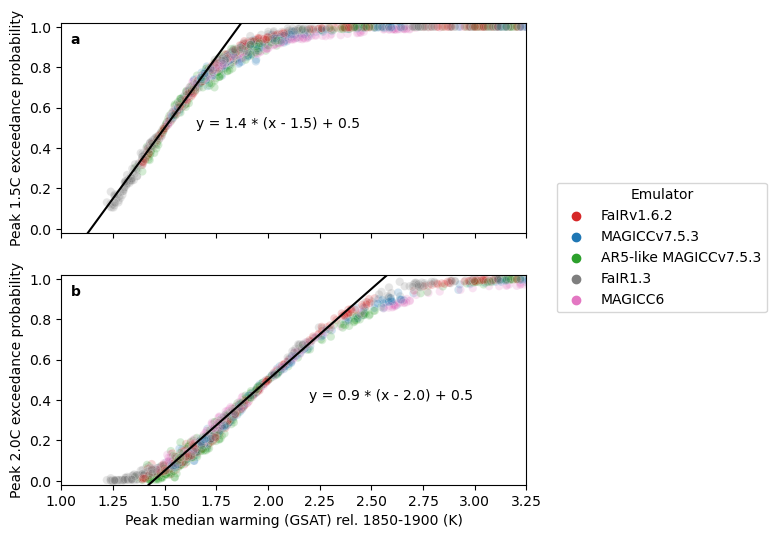

model                                scenario
0             AIM/CGE 2.0                  ADVANCE_2020_1.5C-2100
5             IMAGE 3.0.1                  ADVANCE_2020_1.5C-2100
10    MESSAGE-GLOBIOM 1.0                  ADVANCE_2020_1.5C-2100
15          POLES ADVANCE                  ADVANCE_2020_1.5C-2100
20             REMIND 1.7                  ADVANCE_2020_1.5C-2100
...                   ...                                     ...
1814          AIM/CGE 2.1              TERL_15D_NoTransportPolicy
1819          AIM/CGE 2.1        TERL_2D_LowCarbonTransportPolicy
1824          AIM/CGE 2.1               TERL_2D_NoTransportPolicy
1829          AIM/CGE 2.1  TERL_Baseline_LowCarbonTransportPolicy
1834          AIM/CGE 2.1         TERL_Baseline_NoTransportPolicy

[368 rows x 2 columns]

<IPython.core.display.Javascript object>

In [72]:
pdf = variable_stack.loc[
    variable_stack.index.get_level_values("SR1.5 Table 2.4").isin([True]), :
].reset_index()
pdf["Emulator"] = pdf["id"].map(utils.plotting.ID_MAP)


fig, axes = plt.subplots(figsize=(6, 6), sharex=True, nrows=2)

for i, (x, x_label, y, y_label, x_1, y_1, grad, ax, xytext) in enumerate(
    (
        (
            "Peak median surface temperature (GSAT)",
            "Peak median warming (GSAT) rel. 1850-1900 (K)",
            "Peak 1.5C exceedance probability",
            "Peak 1.5C exceedance probability",
            1.5,
            0.5,
            1.4,
            axes[0],
            (1.65, 0.5),
        ),
        (
            "Peak median surface temperature (GSAT)",
            "Peak median warming (GSAT) rel. 1850-1900 (K)",
            "Peak 2.0C exceedance probability",
            "Peak 2.0C exceedance probability",
            2.0,
            0.5,
            0.9,
            axes[1],
            (2.2, 0.4),
        ),
    )
):
    ax = sns.scatterplot(
        data=pdf,
        x=x,
        y=y,
        hue="Emulator",
        palette={
            utils.plotting.ID_MAP[k]: v for k, v in utils.plotting.ID_COLOURS.items()
        },
        alpha=0.2,
        ax=ax,
    )
    ax.set_xlim([1, 3.25])
    ax.set_ylim([-0.02, 1.02])

    ax.axline((x_1, y_1), slope=grad, color="k")
    ax.annotate(f"y = {grad} * (x - {x_1}) + {y_1}", xy=(x_1, y_1), xytext=xytext)

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

    ax.annotate(
        string.ascii_lowercase[i],
        xy=(0.02, 0.9),
        xycoords="axes fraction",
        fontweight="bold",
    )

    if i < 1:
        ax.legend(loc="center left", bbox_to_anchor=(1.05, -0.07), title="Emulator")
    else:
        ax.legend().remove()

for ext in [".pdf", ".png"]:
    plt.savefig(
        os.path.join(utils.FIGURES_DIR, f"210_temp-v-exceedance-probs{ext}"),
        transparent=True,
        bbox_inches="tight",
    )
plt.show()
pdf[["model", "scenario"]].drop_duplicates()